### 环境配置
下载完music21后，还需要下载另一个东西，就是MusicXML格式文件的阅读器，这里用的是[MuseScore3](https://musescore.org/zh-hans)，安装包已经上传到咱们群里了。随便在哪里安装都可以。

接下来要介绍的是music21的环境配置，这个库自带环境配置的代码模块，如下所示：

In [1]:
from music21 import *
env = environment.Environment()
for key in env.keys():
    print(key)

localCorpusSettings
lilypondBackend
showFormat
lilypondPath
autoDownload
manualCoreCorpusPath
pdfPath
debug
ipythonShowFormat
writeFormat
braillePath
lilypondVersion
musicxmlPath
localCorporaSettings
vectorPath
warnings
lilypondFormat
midiPath
directoryScratch
musescoreDirectPNGPath
graphicsPath
localCorpusPath


`environment.Environment()`是一个类似字典的东西，上面已经打印出了所有键值，我们只需找到安装musecore的路径，并赋值给对应的元素，就可以了。这里我们主要赋值两个键所对应的路径：
- musicXML
- musescore

In [2]:
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])

musicXML:   D:\Program Files\MuseScore 3\bin\MuseScore3.exe
musescore:  D:\Program Files\MuseScore 3\bin\MuseScore3.exe


跟我上面所打印出来的一样，只要赋值MuseScore3.exe所在的可执行程序路径，就可以了。

### 修改某处的py文件
光做完上面这步的话，在cmd和idle中是可以正常打开MuseScore3来显示乐谱的，但是在jupyter中不可以。我们需要找到一个叫做` subconverters.py `的文件，并且将里面的`os.system(musescoreRun)`替换成`subprocess.run(musescoreRun)`就可以了。当然，还需要额外再添加一句`import subprocess`，就像我这里这样
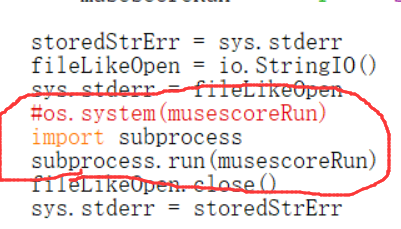
该问题是在[这里](https://github.com/cuthbertLab/music21/issues/348)找到的解决方案，可以进入这个页面后直接搜索`GaetanBaert`就能看到他的回答(和我点的赞)了

接下来，就可以快乐的玩耍了。

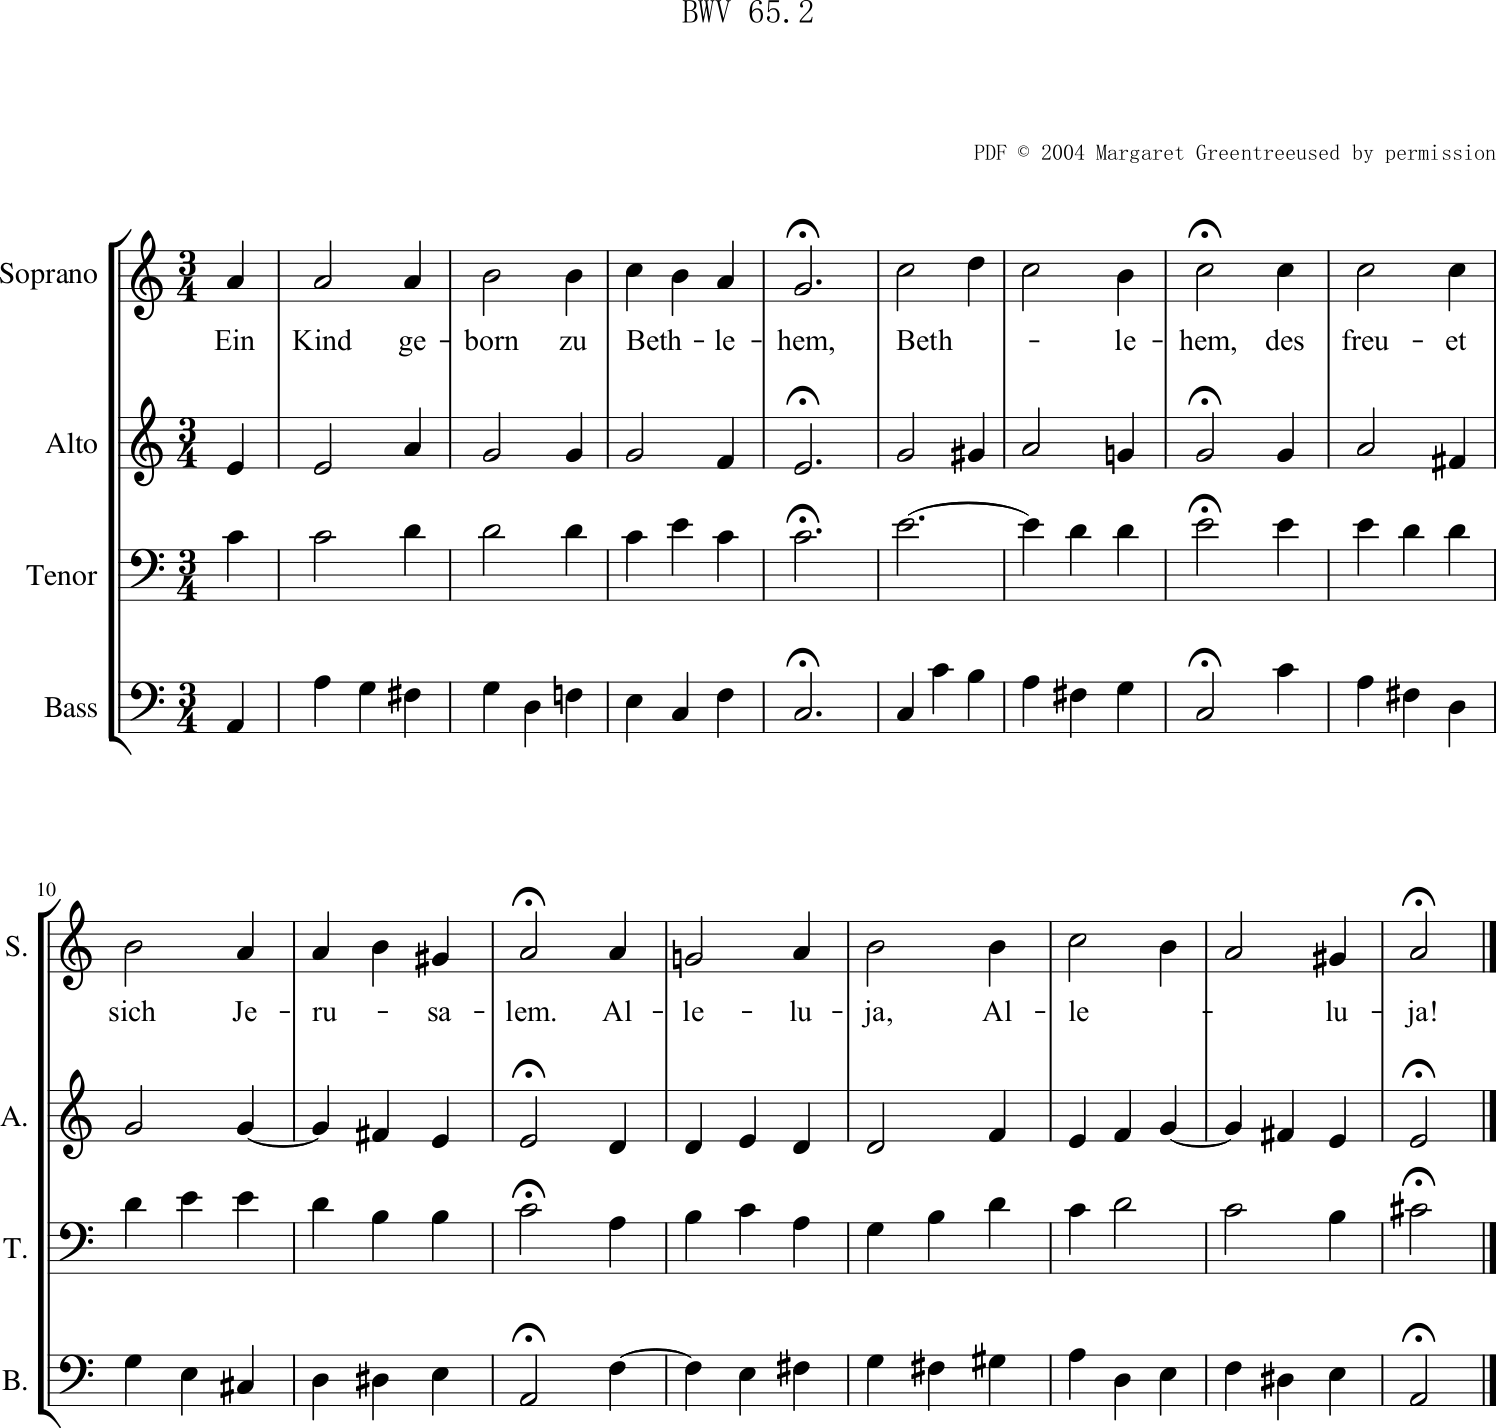

In [3]:
s = corpus.parse('bach/bwv65.2.xml')
s.show()
s.show('midi')

对了，还有一件事，可以通过这种方式保存文件：

In [4]:
s.write('midi', fp=r'C:\Users\UncleDong\Desktop\啦啦啦.wav')

'C:\\Users\\UncleDong\\Desktop\\啦啦啦.wav'

fp自然就是你的路径名了，你需要将`路径+文件名`都写进去。

**注意**：虽然我的文件命名是.wav，但由于是以midi格式进行保存的，我不确保这就是标准格式的wav文件，最好再进行一次格式转换。